**PENJELASAN STUDI KASUS**

Disini saya akan membuat projek Deep Learning CNN menggunakan Tensorflow dan Keras. Dimana saya akan mengolah data MNIST. MNIST adalah sebuah dataset yang berisi kumpulan gambar tulisan tangan. Sebanyak 70.000 gambar yang akan dibagi menjadi 2 bagian. 60.000 untuk train dan 10.000 untuk test.

Dalam pengerjaan saya menggunakan Google Colaboratory.

Data latih : (60000, 28, 28)
Data uji : (10000, 28, 28)


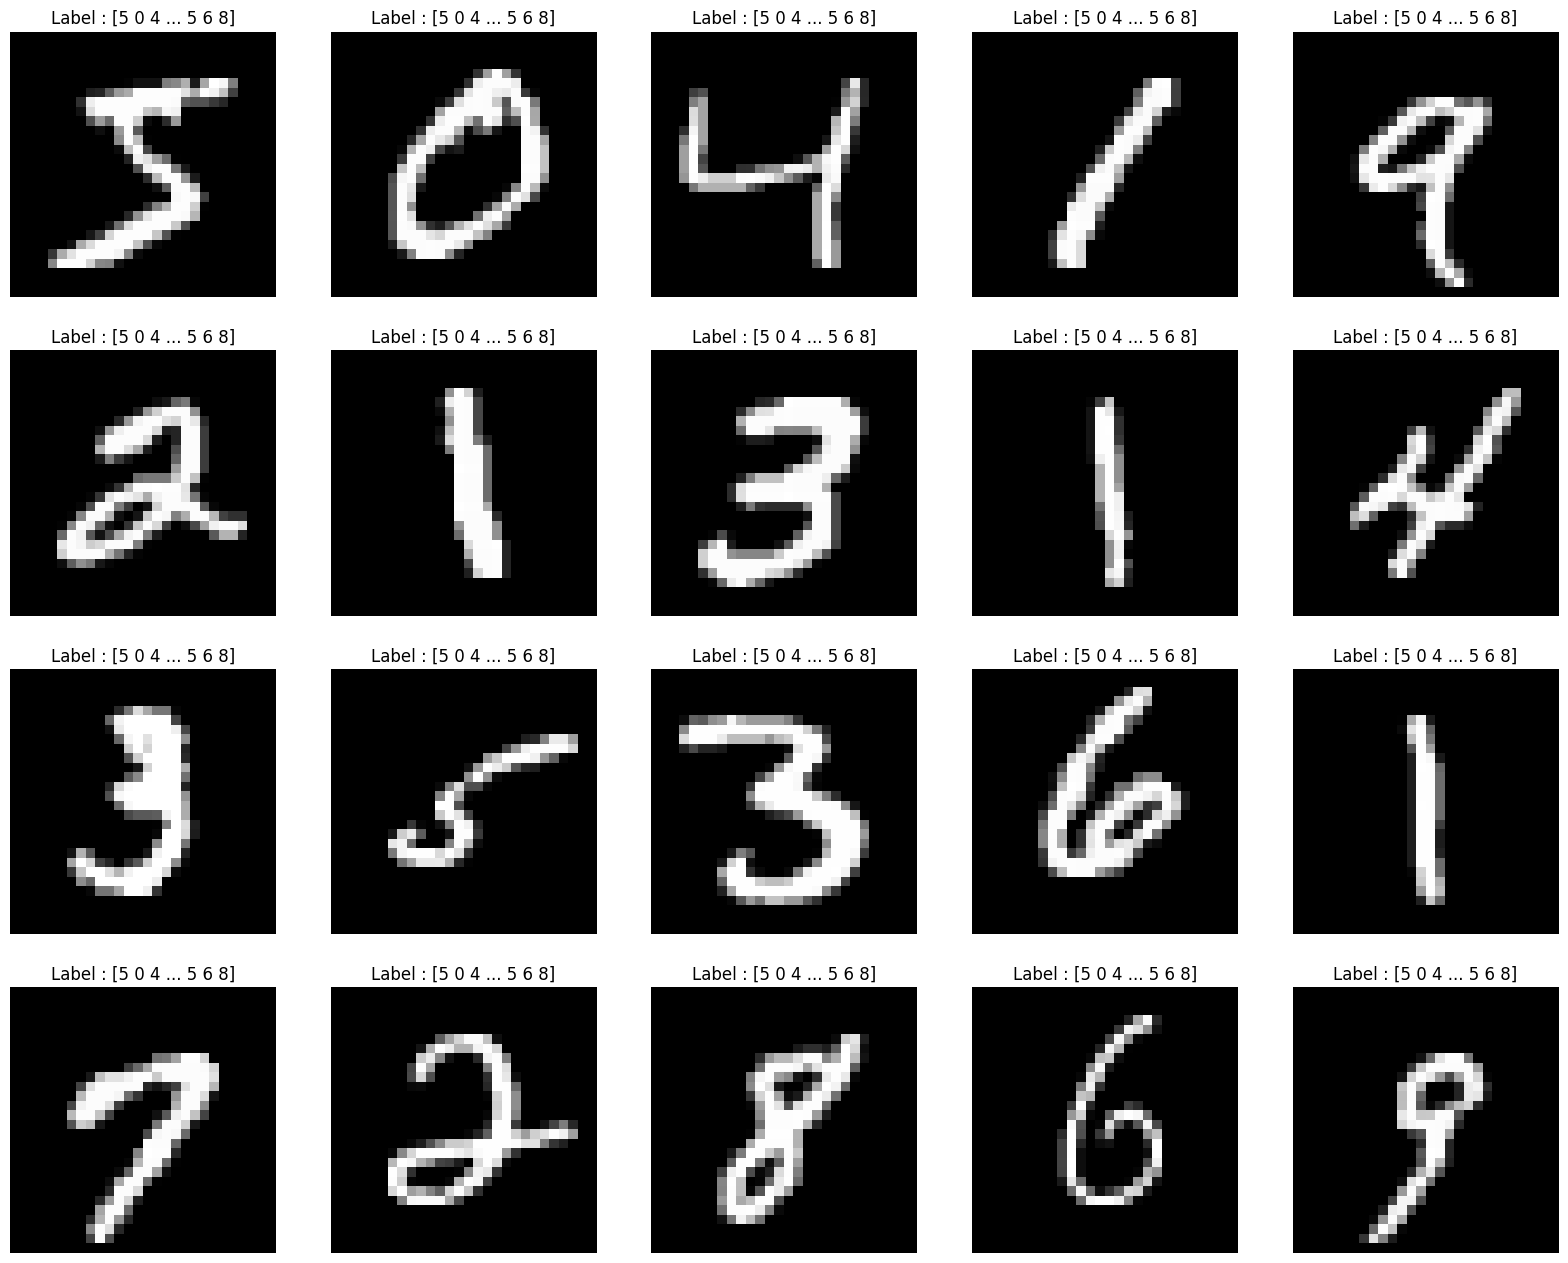

In [ ]:
# IMPORT DATASET DAN LOAD DATA

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# load gambar
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# cek bentuk data
print(f"Data latih : {train_images.shape}")
print(f"Data uji : {test_images.shape}")

# visualisasiin beberapa gambar Bro
plt.figure(figsize=(20, 20))
for i in range(20):
  plt.subplot(5, 5, i+1)
  plt.imshow(train_images[i], cmap='grey')
  plt.title(f"Label : {train_labels}")
  plt.axis('off')
plt.show()


**Langkah-Langkah Preprocessing:**

**Rescale (Skalakan Pixel Gambar)**

Dataset MNIST itu punya gambar dengan pixel yang nilainya antara **0-255 **(grayscale).

Biasanya, kita scaling pixel ke range **0-1** biar lebih nyaman buat model dalam belajar.
Gimana caranya? Kita bagi pixel dengan **255.**

**Reshape Gambar (Opsional)**

MNIST punya gambar **28x28 pixel**. Kalau lo mau, kita bisa ubah bentuk data supaya sesuai dengan input model.

**One-Hot Encoding untuk Labels**

Labels MNIST itu angka 0-9, tapi model biasanya lebih suka kalau kita **convert angka-angka ini jadi format one-hot encoding**. Misalnya, angka 3 jadi [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

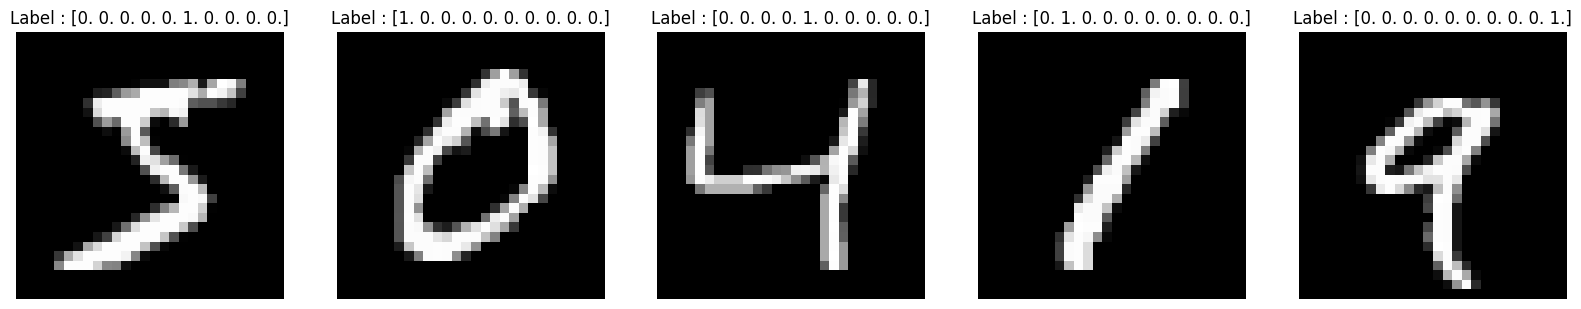

In [ ]:
# NORMALISASI DULU BRATHERRRR

train_images = train_images/255
test_images  = test_images/255

# ONE HOT ENCODING -> SE HOT MINGYU SEVENTEEN EAK

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Lihat hasil label encoding, Bro

plt.figure(figsize=(20, 20))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(train_images[i], cmap='grey')
  plt.title(f"Label : {train_labels[i]}")
  plt.axis('off')
plt.show()



**TAHAP PEMBUATAN MODEL NEURAL NETWORK**

- menggunakan CNN
- Optimizer Adam -> agar cepat dan stabil
- 64 neuron di hidden layer
- 10 kelas output 0-9
- softmax untuk probabilitas

tahap :
1. Convolusional
2. Pooling
3. Flatten
4. Dense



In [ ]:
model = models.Sequential([
    # Layer Conv 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # 32 = filter, ukuran 3x3. relu = drop nilai negatif
    layers.MaxPool2D((2,2)),

    # layer Conv 2
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    # faltten
    layers.Flatten(),

    # dense
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi Model
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy', # untuk klasifikasi multi kelas
              metrics =['accuracy'])  # monitor akurasi

# latih model
history = model.fit(train_images, train_labels, epochs =5,
                    validation_data=(test_images, test_labels))

# eval
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Akurasi: {test_acc:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 25ms/step - accuracy: 0.8838 - loss: 0.3726 - val_accuracy: 0.9838 - val_loss: 0.0523
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 27ms/step - accuracy: 0.9832 - loss: 0.0548 - val_accuracy: 0.9823 - val_loss: 0.0517
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.9880 - loss: 0.0378 - val_accuracy: 0.9913 - val_loss: 0.0283
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9917 - loss: 0.0275 - val_accuracy: 0.9894 - val_loss: 0.0309
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9926 - loss: 0.0215 - val_accuracy: 0.9896 - val_loss: 0.0321
313/313 - 2s - 7ms/step - accuracy: 0.9896 - loss: 0.0321
Akurasi: 0.99


**WAKTUNYA MAIN MAIN PAKE GAMBAR SENDIRI**

Masukkan path gambar : image_test_3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


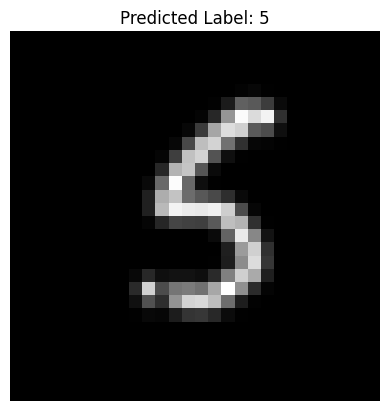

Prediksi model : Angka 5


In [ ]:
import numpy as np  # -> gambar akan diubah jd array
from PIL import Image  # -> Baca, resize, ubah gambar ke grayscale

# 1. Load Gambar
file = input("Masukkan path gambar : ")

try:
  image = Image.open(file).convert('L')  # Convert ke grayscale
  image = image.resize((28, 28))  # Resize ke 28x28

  # 2. Normalisasi Gambar
  image_array = np.array(image) / 255.0  # Normalisasi ke range 0-1

  # 3. Tambah Dimensi
  image_array = image_array.reshape(1, 28, 28, 1)  # Tambah batch dimension

  # 4. Prediksi Model
  predictions = model.predict(image_array)
  predicted_label = np.argmax(predictions)

  # 5. Tampilkan Gambar & Hasil Prediksi
  plt.imshow(image_array[0, :, :, 0], cmap='gray')
  plt.title(f"Predicted Label: {predicted_label}")
  plt.axis('off')
  plt.show()

  print(f"Prediksi model : Angka {predicted_label}")
except FileNotFoundError:
  print("File tidak ditemukan")
except Exception as e:
  print(f"Terjadi eror: {e}")